# SIR Epidemic Model

$S(t)$ - Susceptible  
$I(t)$ - Infected  
$R(t)$ - Recovered

$$S + I + R = N,$$  
$$\frac{dS}{dt} = - \frac{\beta S I}{N},$$  
$$\frac{dI}{dt} = \frac{\beta S I}{N}-\gamma I,$$  
$$\frac{dR}{dt} = \gamma I$$

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
import matplotlib.dates as mdates

sns.set(style="ticks", color_codes=True)
plt.style.use('classic')
plt.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':12})
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%M')
%matplotlib inline

In [53]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('imdevskp/corona-virus-report', path='data/', unzip=True)

In [54]:
df = pd.read_csv('data\covid_19_clean_complete.csv')

In [55]:
df_uk = df['Country/Region'] == 'United Kingdom'

In [56]:
df_uk_full = df[df_uk]['Province/State'].isnull()

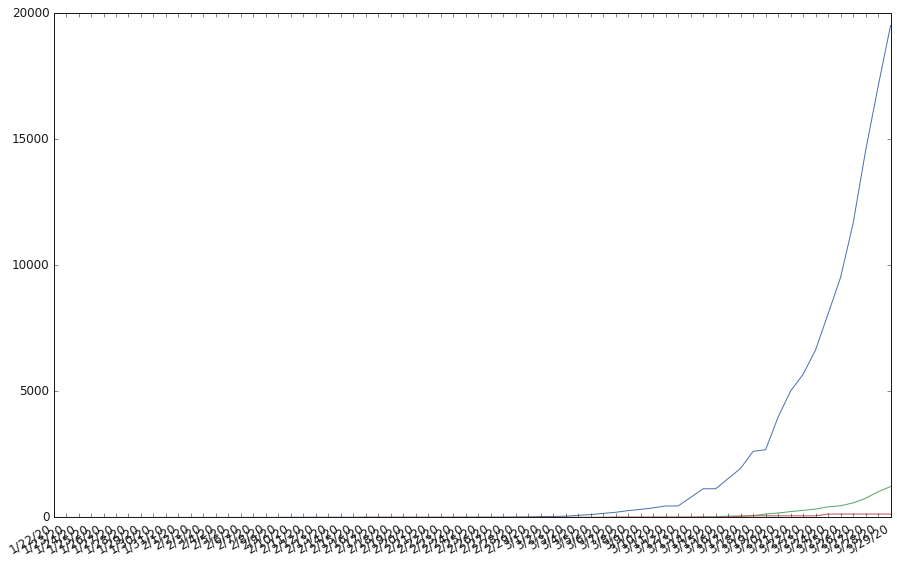

In [64]:
fig_CDR = plt.figure(figsize = (15,10))
ax1_CDR = fig_CDR.add_subplot(1, 1, 1)
ax1_CDR.plot(df[df_uk][df_uk_full]['Date'],df[df_uk][df_uk_full]['Confirmed'])
ax1_CDR.plot(df[df_uk][df_uk_full]['Date'],df[df_uk][df_uk_full]['Deaths'])
ax1_CDR.plot(df[df_uk][df_uk_full]['Date'],df[df_uk][df_uk_full]['Recovered'])
fig_CDR.autofmt_xdate()